###############################
## 19CSE303 Foundations of Data Science - PROJECT
## Title: Hotel Booking Demand dataset cleanup
## Group no. 1
## CSE A Batch 2020
################################

### Members             Roll No.
#### Akshay PM          AM.EN.U4CSE20006
#### Anurag             AM.EN.U4CSE20010
#### Purushoath         AM.EN.U4CSE20022
#### Ritik Kumar Singh  AM.EN.U4CSE20061
#### T Vishnu Sandeep   AM.EN.U4CSE20073

#### Project: We have a hotel booking dataset that has various columns such as number of members in the room, data of reservation, mode of booking, room reserved etc. We are given a mix of data that includes strings, boolean, dates, integers etc. Many of the columns are having missing values and also the data ranges of a few columns have a high range of values.We are supposed to clean the data first using preprocessing methods, try to reduce its dimensions, reduce redundancy, visualize it and further try to apply a machine learning model to predict whether the booking will be cancelled or not.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hotel_df = pd.read_csv("E:/Codes/Data Science/DataScience Python/Datsets/hotel_bookings.csv")
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
#### Dataset shape
hotel_df.shape

(119390, 32)

In [4]:
#### Dataset info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###########
### DATA PREPROCESSING
###########

In [5]:
##### Copying original dataset
df = hotel_df

In [6]:
#### Print NULL values dataset
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

In [7]:
#### Calculating percentage of missing values
def miss_val(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {0}\nAgent: {1}\nCountry: {2}'.format(miss_val(df, df['company']),
                                                                          miss_val(df, df['agent']),
                                                                          miss_val(df, df['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


#### As we can see 94.3% of company column are missing values. Therefore we do not have enough values to fill the rows of company column by predicting, filling by mean etc. It seems that the best option is dropping company column.

In [8]:
#### company is dropped
df = df.drop(['company'], axis = 1)

In [9]:
#### agent counts
df["agent"].value_counts().count()

333

##### We can't predict agents and since missing values are 13% of all data we can't drop them too

In [10]:
#### replacing NaN children values with 0
df['children'] = df['children'].fillna(0)

##### We have also 4 missing values in children column. If there is no information about children, In my opinion those customers do not have any children.

In [11]:
df['hotel'] = df['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6,
                                                             'July':7,'August':8, 'September':9, 'October':10, 'November':11,
                                                             'December':12})

In [12]:
def family(data):
    if (data['adults'] > 0) & (data['children'] > 0):
        val = 1
    elif (data['adults'] > 0) & (data['babies'] > 0):
        val = 1
    else:
        val = 0
    return val

def deposit(data):
    if (data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable'):
        return 0
    else:
        return 1

In [13]:
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data

df = feature(df)

#### Creating separate features from available columns to reduce the data dimensions

In [14]:
# Information of these columns is also inside new features, so dropping them.
df = df.drop(columns = ['adults', 'babies', 'children', 'deposit_type'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [15]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'deposit_given', 'total_nights'],
      dtype='object')

In [16]:
#### copying data for correlation
corr_df = df.copy()

In [17]:
# This data is only being used for checking correlations hence won't be used for prediction
le = LabelEncoder()
corr_df['meal'] = le.fit_transform(corr_df['meal'])
corr_df['distribution_channel'] = le.fit_transform(corr_df['distribution_channel'])
corr_df['reserved_room_type'] = le.fit_transform(corr_df['reserved_room_type'])
corr_df['assigned_room_type'] = le.fit_transform(corr_df['assigned_room_type'])
corr_df['agent'] = le.fit_transform(corr_df['agent'])
corr_df['customer_type'] = le.fit_transform(corr_df['customer_type'])
corr_df['reservation_status'] = le.fit_transform(corr_df['reservation_status'])
corr_df['market_segment'] = le.fit_transform(corr_df['market_segment'])

In [18]:
#### Correlation of data
corr_df.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,0.008018,...,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.124331,-0.058306,-0.040821,0.172003,-0.247479
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.017678,...,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,-0.013010,0.046522,0.481457,0.017779
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.000349,...,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,-0.043972,0.072265,0.380179,0.157167
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.065840,...,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.052711,0.052127,-0.065963,0.031438
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.015205,...,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.010427,0.027252,0.008746,0.021536
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.017381,...,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.010611,0.025220,0.007773,0.018719
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.007086,...,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,0.014710,0.006742,-0.008616,-0.027408
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.045744,...,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558,0.052306,0.101426,-0.114275,0.762790
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.036742,...,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607,0.050424,0.101665,-0.079999,0.941005
meal,0.008018,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,0.045744,0.036742,1.000000,...,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,-0.041727,-0.005975,-0.090725,0.045277


In [19]:
corr_df.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
agent                            -0.130010
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
meal                             -0.017678
is_family                        -0.013010
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
total_nights                      0.017779
stays_in_week_nights              0.024765
total_customer                    0.046522
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
previous_ca

#### Reservation_status seems to be most impactful feature. With that information accuracy rate should be really high.
#### arrival_date_week_number, stays_in_weekend_nights and arrival_date_day_of_month since their importances are really low while predicting cancellations.

In [20]:
cor_df = corr_df.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [21]:
#Lets delete the NA rows of country column
indices = corr_df.loc[pd.isna(corr_df["country"]), :].index
corr_df = corr_df.drop(corr_df.index[indices])
corr_df.isnull().sum()

#There is no missing value in the data

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
is_family                   

In [22]:
#### Replacing original dataframe with the new edits
indices = df.loc[pd.isna(df["country"]), :].index
df = df.drop(df.index[indices])
df = df.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [23]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'deposit_given', 'total_nights'],
      dtype='object')

In [24]:
df1 = df.copy()
#one-hot-encoding
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])
df1['country'] = le.fit_transform(df1['country'])

### Data Visualization

<AxesSubplot: >

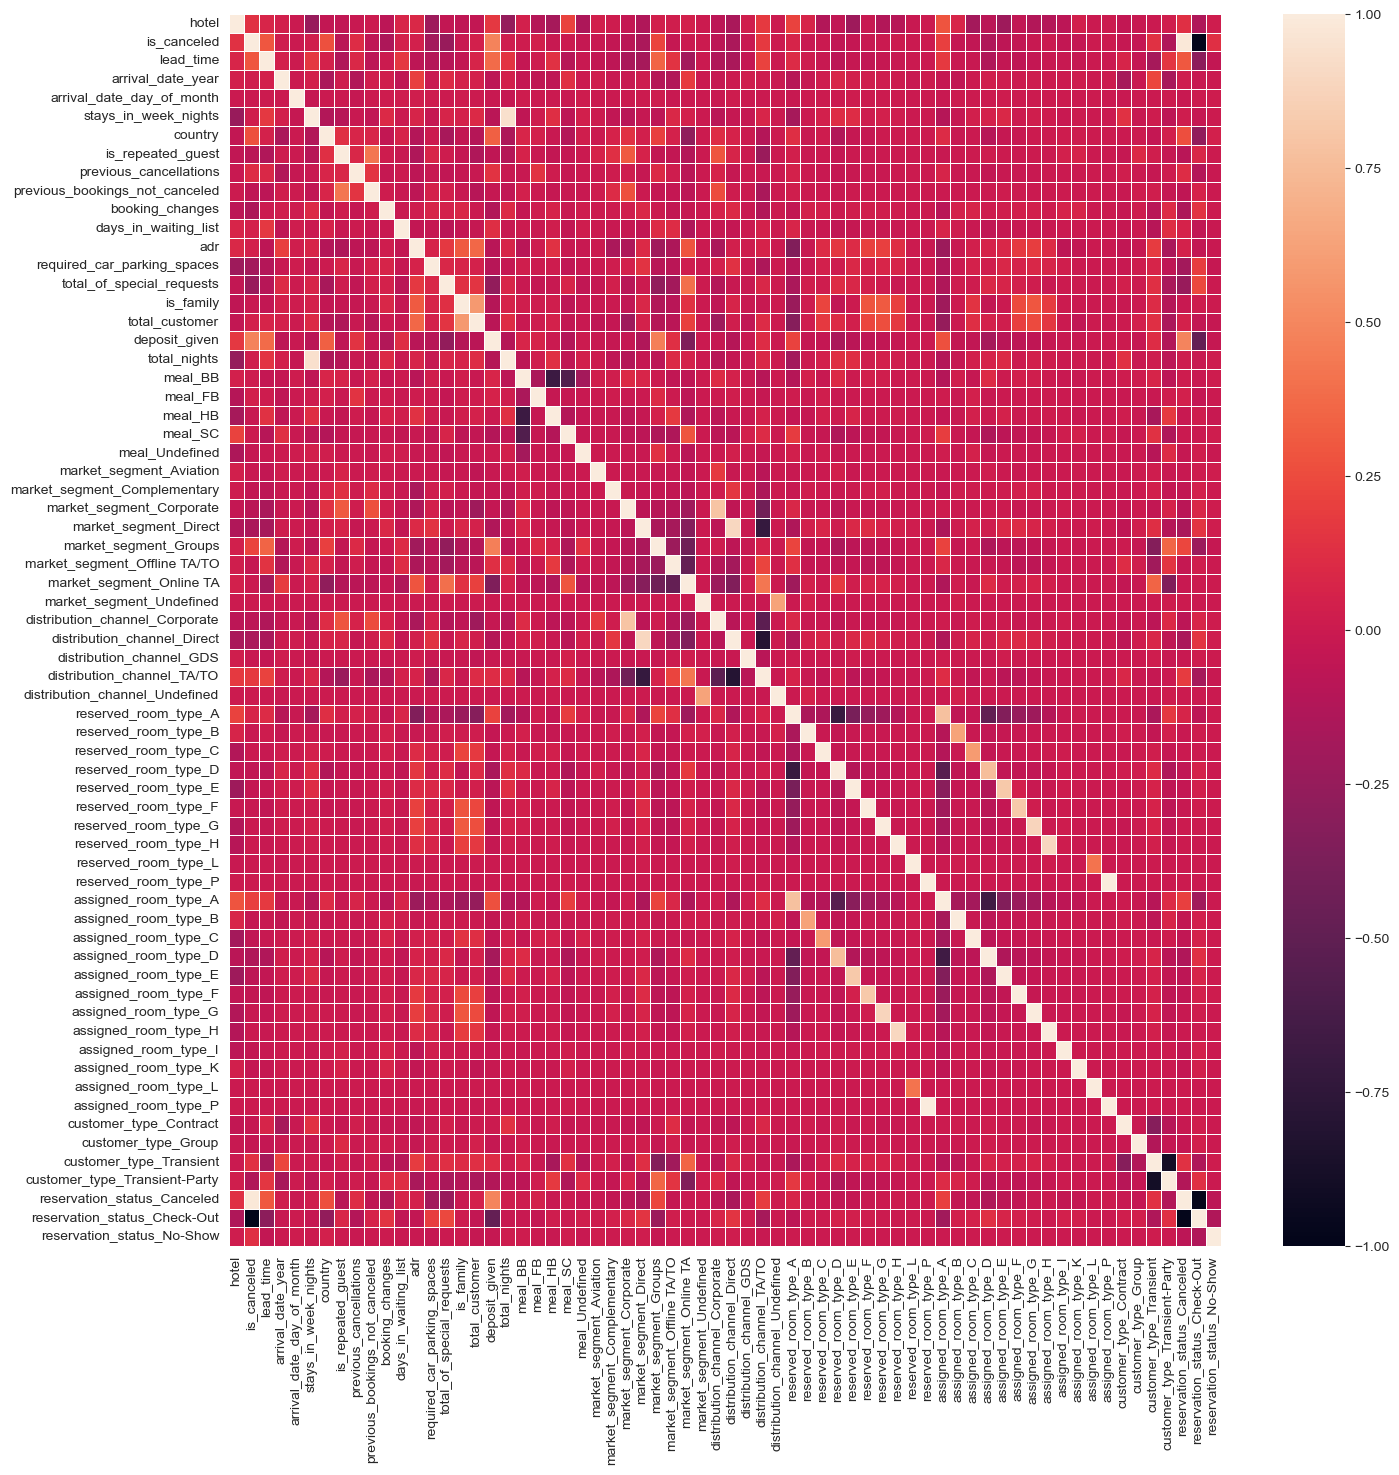

In [25]:
fig, ax = plt.subplots(figsize=(16,16))         # Sample figsize in inches
sns.heatmap(df1.corr(), linewidths=.5, ax=ax)

<Figure size 5000x5000 with 0 Axes>

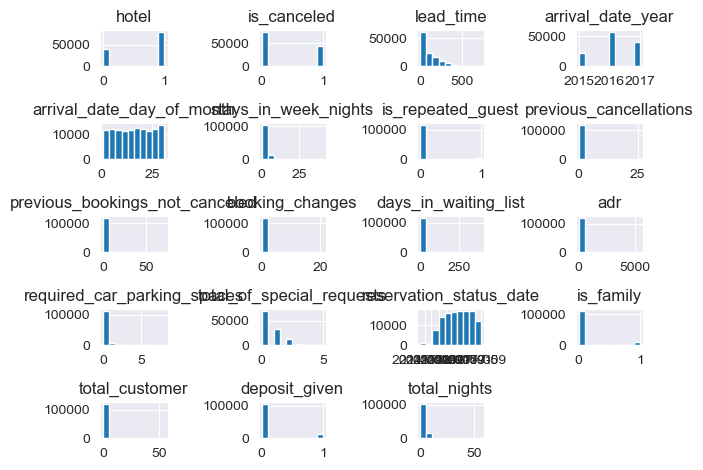

In [26]:
plt.figure(figsize=(50,50))
df.hist()
plt.tight_layout()
plt.show()

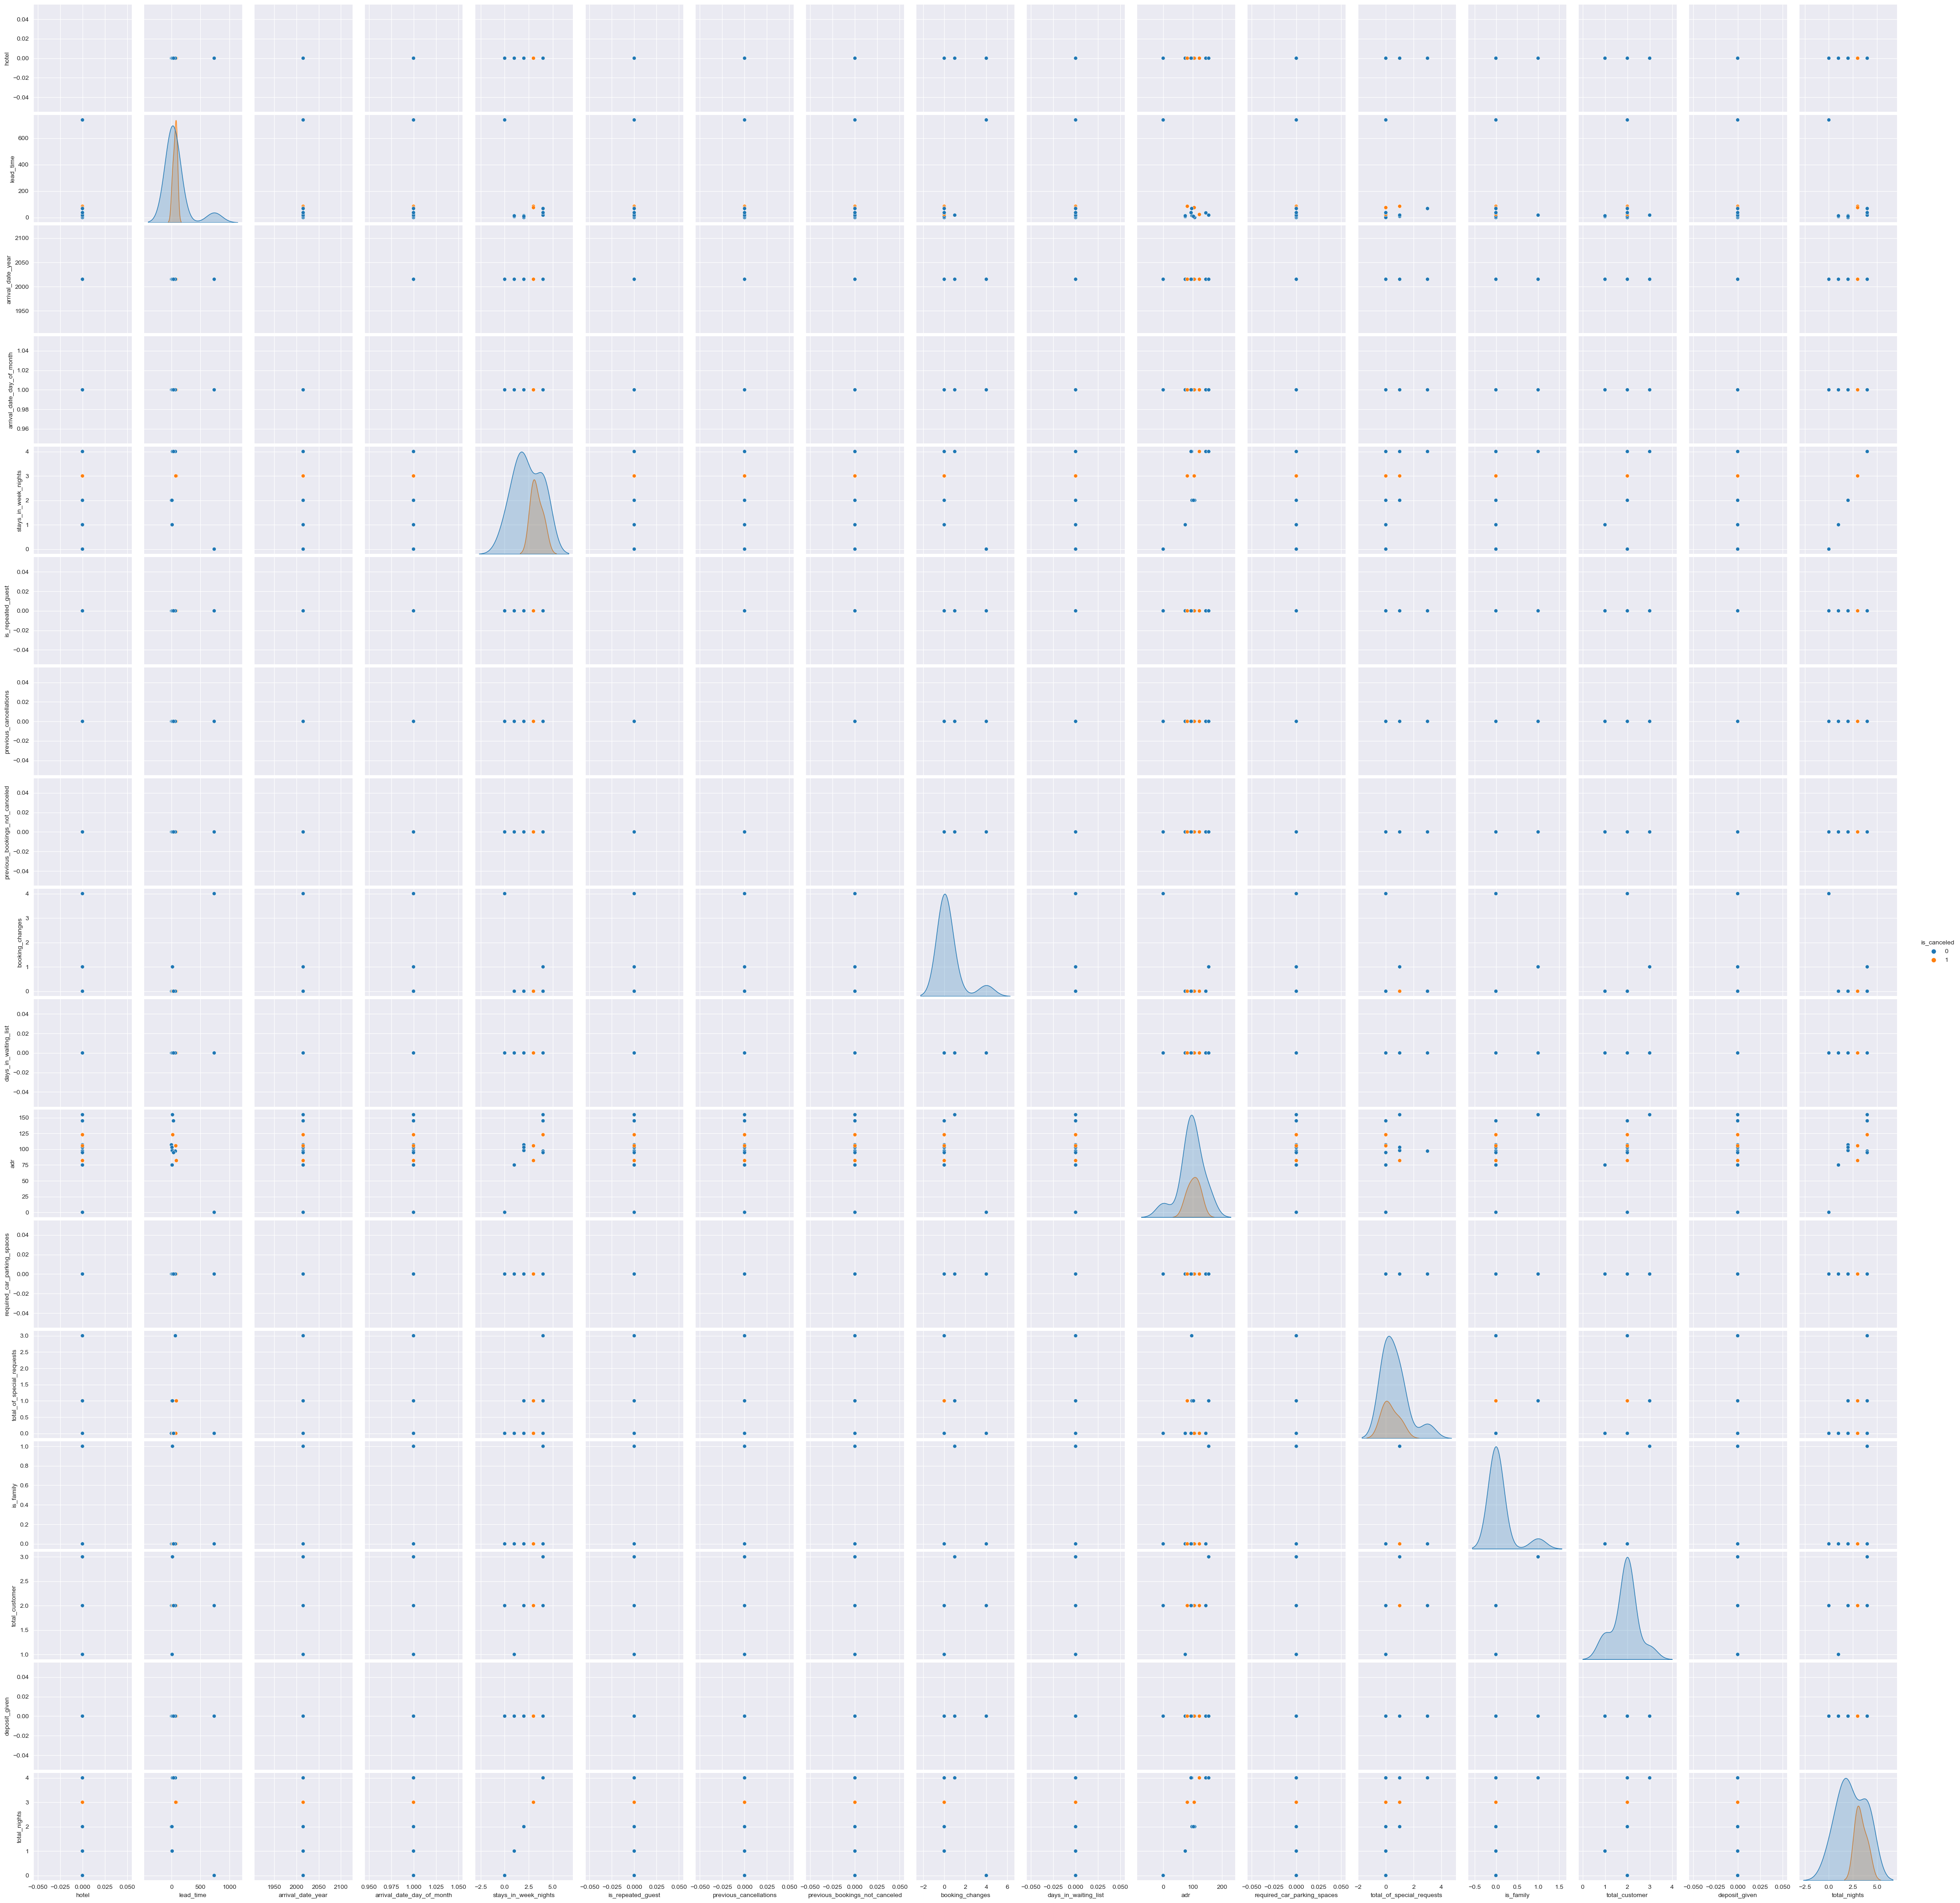

In [27]:
######### Plotting the target variable with all the Features
sns.pairplot(df[1:15], hue="is_canceled")
plt.show()

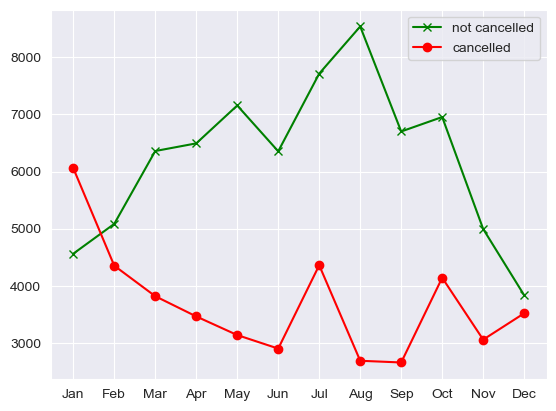

In [28]:
class_0 = df[df['is_canceled'] == 0]
class_1 = df[df['is_canceled'] == 1]
month_group_0 = class_0.groupby(class_0['reservation_status_date'].dt.month)
month_group_1 = class_1.groupby(class_1['reservation_status_date'].dt.month)
sum_0 = month_group_0.agg({'is_canceled':'count'})
sum_1 = month_group_1.agg({'is_canceled':'count'})
Month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(Month,sum_0,color='green',marker='x',label = 'not cancelled')
plt.plot(Month,sum_1,color='red',marker='o',label = 'cancelled')
plt.legend(loc = 'upper right')

### Applying Machine Learning Model
#### Using Decision TREE

In [29]:
df1.drop(columns = ['reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis = 1,inplace= True)
y = df1["is_canceled"]
X = df1.drop(["reservation_status_date","is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [30]:
cart = DecisionTreeClassifier(max_depth = 12)
cart_model = cart.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print('Decision Tree Model')
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Decision Tree Model
Accuracy Score: 0.846485940960444

Confusion Matrix:
 [[20375  1978]
 [ 3498  9820]]

AUC Score: 0.8244293546624384


Text(0.5, 0, 'Feature Importances (%)')

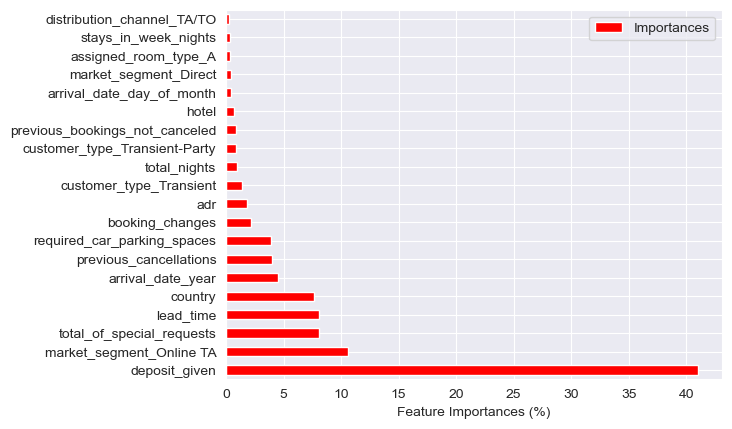

In [31]:
pd.DataFrame(data = cart_model.feature_importances_*100,
             columns = ["Importances"],
             index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

#### Using Random Forest

In [32]:
#### Using Random Forest
RFS = RandomForestClassifier()
model_RFS = RFS.fit(X_train, y_train)
y_pred = model_RFS.predict(X_test)
print('RFS')
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

RFS
Accuracy Score: 0.8837711306102997

Confusion Matrix:
 [[20954  1399]
 [ 2747 10571]]

AUC Score: 0.8655755605323788


In [33]:
### Random Forest is also a Decision Tree based classifier which make multiple trees (Forest) improving result of previous tree

#### Using Logistic Regression

In [34]:
model_logr = LogisticRegression()
logr_model = model_logr.fit(X_train, y_train)
y_pred = logr_model.predict(X_test)
print('Logistic Regression')
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Logistic Regression
Accuracy Score: 0.7849793950267725

Confusion Matrix:
 [[19860  2493]
 [ 5177  8141]]

AUC Score: 0.7498746578965756


#### Using KNN

In [35]:
#### Using KNN
classifier = KNeighborsClassifier(n_neighbors=5)
model_KNN = classifier.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
print(y_pred)
print('KNN')
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

[0 0 1 ... 0 0 1]
KNN
Accuracy Score: 0.7862409239998879

Confusion Matrix:
 [[19247  3106]
 [ 4519  8799]]

AUC Score: 0.7608662607952709


#### Using Gaussian Naive Bayes

In [36]:
#### Using Gaussian Naive Bayes
GNB = GaussianNB()
GNB_model = GNB.fit(X_train, y_train)
y_pred = GNB_model.predict(X_test)
print('GaussianNB')
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

GaussianNB
Accuracy Score: 0.586246530795324

Confusion Matrix:
 [[ 9604 12749]
 [ 2010 11308]]

AUC Score: 0.6393639694103459


### We find that Tree Type classifiers work best on the data with the current configuration and preprocessing